In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('train.csv')

In [3]:
y = df['Survived']

In [4]:
features_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features_to_use].copy()

In [5]:
# --- Handle Missing Data ---
X['Age'] = X['Age'].fillna(X['Age'].median())

X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

In [6]:
# --- Handle Categorical Data ---
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [7]:
print("--- Processed Features (X) ---")
print(X.head())
print("\n")

--- Processed Features (X) ---
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True




In [8]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(X_train, y_train)

In [10]:
y_pred = treemodel.predict(X_test)

In [11]:
score = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {score:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_pred, y_test))

Accuracy Score: 0.8203

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       192
           1       0.71      0.83      0.76       103

    accuracy                           0.82       295
   macro avg       0.80      0.82      0.81       295
weighted avg       0.83      0.82      0.82       295




--- Decision Tree Visualization ---


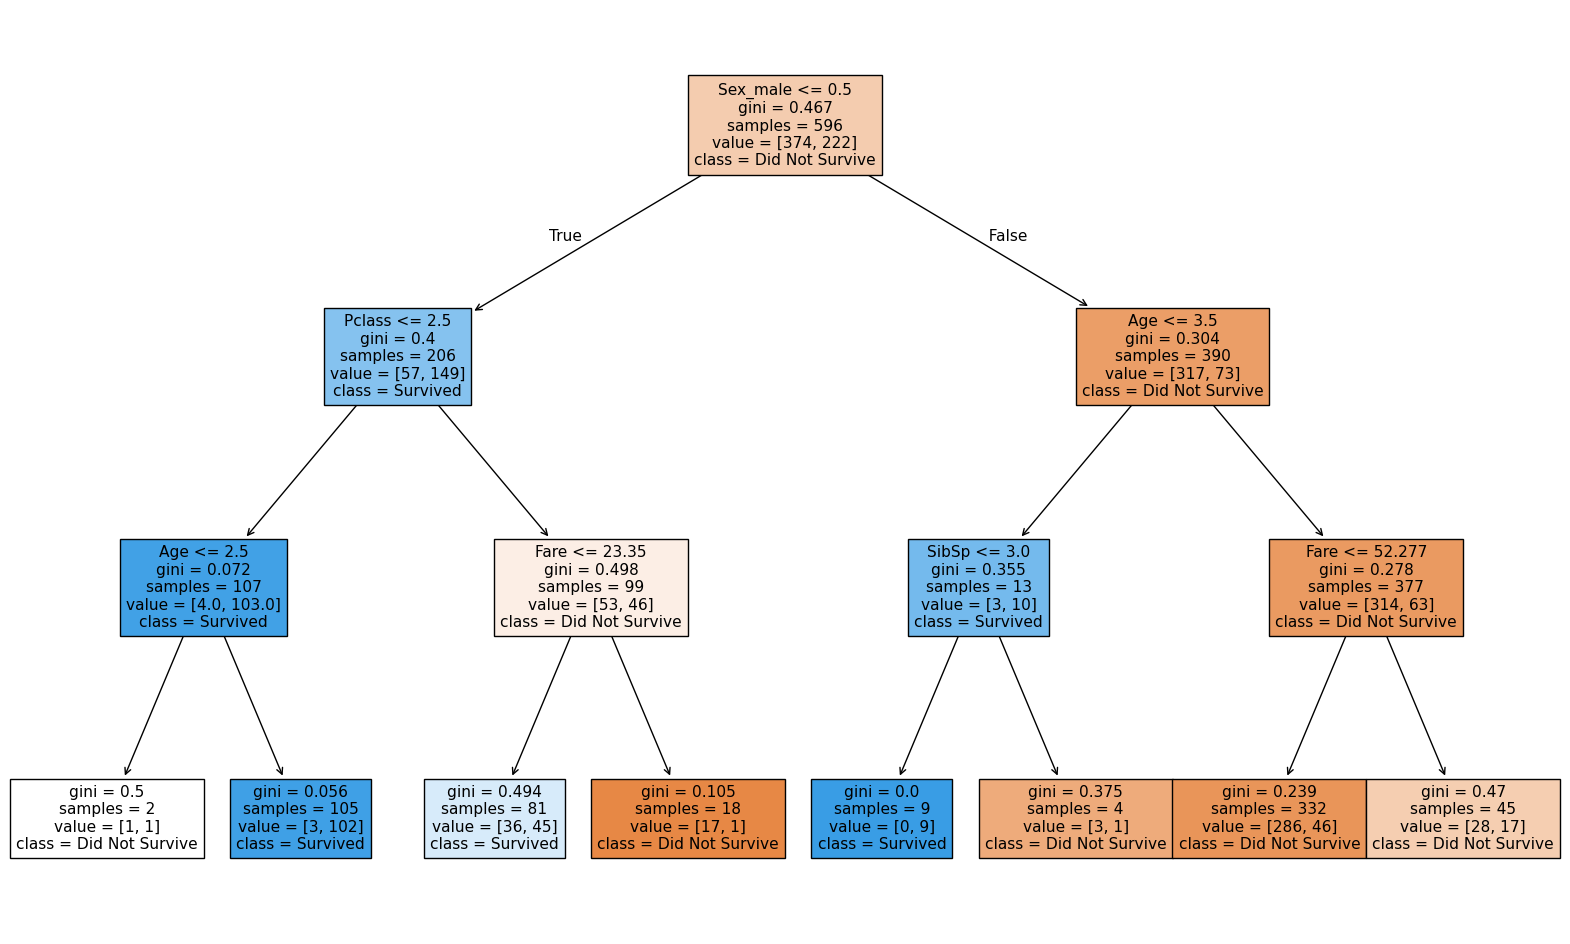

In [12]:
print("\n--- Decision Tree Visualization ---")
plt.figure(figsize=(20, 12))
tree.plot_tree(
    treemodel,
    filled=True,
    feature_names=X.columns.tolist(), # Get feature names from our DataFrame
    class_names=['Did Not Survive', 'Survived'] # Target names
)
plt.show()